### Using the results from the AAI analysis create graphs of AAI versus O2 consumption for SAG pairs on individual days.

### Inputs
/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/All_GoM_SAGs_1cell_20kb_decon_531normalized_predresp_rate_GTDBclass.csv
/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/aai/GoM_RSG_aai_outputs/aai/aai_summary.tsv

### Outputs 
/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/AAI_vs_log10_O2_ratio*.png graph files

rerun on 2021-12-07 after correcting for salinity of media samples

In [1]:
import pandas as pd
from pandas import DataFrame
import os
import sys
import csv
from pathlib import Path
import seaborn as sns
sns.set()
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.show()
from collections import defaultdict
import os.path as op
import glob

os.chdir('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/aai/')
outdir='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/aai/'
images='/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_images/AAI/'
matplotlib.__version__

'3.3.3'

In [2]:
columns=['name', 'GTDB_classification', 'estimated_diameter', 'Predicted_respiration_rate_fmol_O2perhr',
        'Sample_collection_Date', 'gate', 'FACS_date', 'checkM_estimated_completeness']
SAG_key=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/All_GoM_SAGs_1cell_20kb_decon_531normalized_predresp_rate_GTDBclass.csv',
                   usecols=columns)
SAG_key=SAG_key[SAG_key['gate']=='Respiring cells (RSG-positive)']
SAG_key=SAG_key[SAG_key['Sample_collection_Date']==SAG_key['FACS_date']]
SAG_key=SAG_key[SAG_key['checkM_estimated_completeness']>=25]
SAG_list=SAG_key['name'].tolist()
SAG_key

,name,checkM_estimated_completeness,estimated_diameter,Sample_collection_Date,FACS_date,gate,Predicted_respiration_rate_fmol_O2perhr,GTDB_classification
1,AH-135-A02,86.23,0.32,170412,170412,Respiring cells (RSG-positive),0.063356,Hel1-33-131
2,AH-135-A03,74.13,0.31,170412,170412,Respiring cells (RSG-positive),0.004335,IMCC9063
3,AH-135-A04,83.69,0.34,170412,170412,Respiring cells (RSG-positive),0.019320,Thioglobus
5,AH-135-A06,48.49,0.35,170412,170412,Respiring cells (RSG-positive),0.007734,Unclassified
6,AH-135-A07,92.92,0.31,170412,170412,Respiring cells (RSG-positive),0.007103,Unclassified
...,...,...,...,...,...,...,...,...
4728,AH-700-P10,48.93,0.84,190709,190709,Respiring cells (RSG-positive),0.068309,Planktomarina
4729,AH-700-P11,33.62,0.70,190709,190709,Respiring cells (RSG-positive),0.003930,Luminiphilus
4730,AH-700-P13,37.24,0.69,190709,190709,Respiring cells (RSG-positive),0.029714,Planktomarina
4731,AH-700-P14,57.28,1.45,190709,190709,Respiring cells (RSG-positive),0.007228,UBA8649


In [3]:

O2_data=SAG_key[['Predicted_respiration_rate_fmol_O2perhr', 'name', 'Sample_collection_Date']].copy()
O2_data

,Predicted_respiration_rate_fmol_O2perhr,name,Sample_collection_Date
1,0.063356,AH-135-A02,170412
2,0.004335,AH-135-A03,170412
3,0.019320,AH-135-A04,170412
5,0.007734,AH-135-A06,170412
6,0.007103,AH-135-A07,170412
...,...,...,...
4728,0.068309,AH-700-P10,190709
4729,0.003930,AH-700-P11,190709
4730,0.029714,AH-700-P13,190709
4731,0.007228,AH-700-P14,190709


In [4]:
#read result file from RSG_ANI analysis and parse it to remove AAI=0 and add SAG identifiers

aai=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/20210325_GoM_recluster_analysis/aai/GoM_RSG_aai_outputs/aai/aai_summary.tsv',
                sep='\t')
aai=aai[aai['Mean AAI'] != 0.0]
aai['SAG_A']=aai['Genome A'].str[:10]
aai['SAG_B']=aai['Genome B'].str[:10]
aai

,Genome A,Genes in A,Genome B,Genes in B,# orthologous genes,Mean AAI,Std AAI,Orthologous fraction (OF),SAG_A,SAG_B
2952,AH-269-F07_contigs,48,AH-135-I19_contigs,340,1,37.50,0.00,2.08,AH-269-F07,AH-135-I19
2956,AH-269-F07_contigs,48,AH-545-L08_contigs,975,1,39.20,0.00,2.08,AH-269-F07,AH-545-L08
2964,AH-269-F07_contigs,48,AH-545-J16_contigs,1378,1,36.90,0.00,2.08,AH-269-F07,AH-545-J16
2968,AH-269-F07_contigs,48,AH-135-B13_contigs,1200,4,36.42,3.58,8.33,AH-269-F07,AH-135-B13
2979,AH-269-F07_contigs,48,AH-657-I17_contigs,1272,1,40.90,0.00,2.08,AH-269-F07,AH-657-I17
...,...,...,...,...,...,...,...,...,...,...
1082651,AH-269-M23_contigs,412,AH-700-G13_contigs,260,4,34.35,2.59,1.54,AH-269-M23,AH-700-G13
1082652,AH-269-M23_contigs,412,AH-269-I19_contigs,99,11,50.15,11.66,11.11,AH-269-M23,AH-269-I19
1082653,AH-269-M23_contigs,412,AH-657-G05_contigs,970,69,47.83,11.25,16.75,AH-269-M23,AH-657-G05
1082654,AH-269-M23_contigs,412,AH-700-E23_contigs,1080,94,51.32,13.59,22.82,AH-269-M23,AH-700-E23


In [5]:
# parse down results so that the only AAI that i have are between SAGs labeled with RSG
test=aai[aai['SAG_A'].isin(SAG_list)]
test=test[test['SAG_B'].isin(SAG_list)]

# Merge O2 Stats and collection date for SAG_A
test=test.merge(O2_data, left_on='SAG_A', right_on='name', how='left')
test=test.rename(columns={'Predicted_respiration_rate_fmol_O2perhr':'O2_consumed_SAG_A', 
                          'Sample_collection_Date':'Sample_collection_Date_A'})
test=test.drop('name', axis='columns')

# Merge O2 Stats and collection date for SAG_B
test=test.merge(O2_data, left_on='SAG_B', right_on='name', how='left')
test=test.rename(columns={'Predicted_respiration_rate_fmol_O2perhr':'O2_consumed_SAG_B', 
                          'Sample_collection_Date':'Sample_collection_Date_B'})
test=test.drop('name', axis='columns')

# Parse down the dataframe to only include SAGs that were collected on the same day.
test=test[test['Sample_collection_Date_B']==test['Sample_collection_Date_A']]

test['Sample_collection_Date_A']=test['Sample_collection_Date_A'].astype(int)
test['Sample_collection_Date_B']=test['Sample_collection_Date_B'].astype(int)

test

,Genome A,Genes in A,Genome B,Genes in B,# orthologous genes,Mean AAI,Std AAI,Orthologous fraction (OF),SAG_A,SAG_B,O2_consumed_SAG_A,Sample_collection_Date_A,O2_consumed_SAG_B,Sample_collection_Date_B
12,AH-269-L04_contigs,808,AH-269-E13_contigs,894,157,48.76,11.21,19.43,AH-269-L04,AH-269-E13,0.005075,171102,0.396458,171102
28,AH-269-L04_contigs,808,AH-269-L20_contigs,471,24,44.17,9.82,5.10,AH-269-L04,AH-269-L20,0.005075,171102,0.085446,171102
31,AH-269-L04_contigs,808,AH-269-A21_contigs,1483,137,46.25,10.44,16.96,AH-269-L04,AH-269-A21,0.005075,171102,0.004849,171102
44,AH-269-L04_contigs,808,AH-269-M15_contigs,442,34,42.21,9.49,7.69,AH-269-L04,AH-269-M15,0.005075,171102,0.031430,171102
50,AH-269-L04_contigs,808,AH-269-O16_contigs,257,22,42.76,12.05,8.56,AH-269-L04,AH-269-O16,0.005075,171102,0.015716,171102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317183,AH-135-A08_contigs,1028,AH-135-M13_contigs,489,38,40.20,8.13,7.77,AH-135-A08,AH-135-M13,0.025078,170412,0.005110,170412
317189,AH-700-E03_contigs,1862,AH-700-K05_contigs,1201,299,52.50,13.37,24.90,AH-700-E03,AH-700-K05,0.004704,190709,0.008787,190709
317191,AH-700-E03_contigs,1862,AH-700-P18_contigs,733,198,51.21,11.20,27.01,AH-700-E03,AH-700-P18,0.004704,190709,0.003867,190709
317202,AH-700-E03_contigs,1862,AH-700-E23_contigs,1080,673,70.21,14.22,62.31,AH-700-E03,AH-700-E23,0.004704,190709,0.004053,190709


In [6]:

test['absolute_O2_diff']=(test['O2_consumed_SAG_A']-test['O2_consumed_SAG_B']).abs()

#test['O2_diff']=test['O2_consumed_SAG_A']-test['O2_consumed_SAG_B']
test['O2_ratio_A:B']=test['O2_consumed_SAG_A']/test['O2_consumed_SAG_B']
test['O2_ratio_B:A']=test['O2_consumed_SAG_B']/test['O2_consumed_SAG_A']
test['O2_ratio']=test[['O2_ratio_A:B', 'O2_ratio_B:A']].max(axis=1)
test['log_absolute_O2_diff']=np.log10(test['absolute_O2_diff'])
test['log_O2_ratio']=np.log10(test['O2_ratio'])
test.to_csv(outdir+'AAI_data_tmp.csv')
test

/mnt/scgc/scgc_nfs/opt/common/anaconda3a/envs/jacob_env/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Genome A,Genes in A,Genome B,Genes in B,# orthologous genes,Mean AAI,Std AAI,Orthologous fraction (OF),SAG_A,SAG_B,O2_consumed_SAG_A,Sample_collection_Date_A,O2_consumed_SAG_B,Sample_collection_Date_B,absolute_O2_diff,O2_ratio_A:B,O2_ratio_B:A,O2_ratio,log_absolute_O2_diff,log_O2_ratio
12,AH-269-L04_contigs,808,AH-269-E13_contigs,894,157,48.76,11.21,19.43,AH-269-L04,AH-269-E13,0.005075,171102,0.396458,171102,0.391383,0.012801,78.121712,78.121712,-0.407398,1.892772
28,AH-269-L04_contigs,808,AH-269-L20_contigs,471,24,44.17,9.82,5.10,AH-269-L04,AH-269-L20,0.005075,171102,0.085446,171102,0.080371,0.059393,16.837075,16.837075,-1.094900,1.226267
31,AH-269-L04_contigs,808,AH-269-A21_contigs,1483,137,46.25,10.44,16.96,AH-269-L04,AH-269-A21,0.005075,171102,0.004849,171102,0.000225,1.046485,0.955579,1.046485,-3.646991,0.019733
44,AH-269-L04_contigs,808,AH-269-M15_contigs,442,34,42.21,9.49,7.69,AH-269-L04,AH-269-M15,0.005075,171102,0.031430,171102,0.026355,0.161464,6.193319,6.193319,-1.579130,0.791923
50,AH-269-L04_contigs,808,AH-269-O16_contigs,257,22,42.76,12.05,8.56,AH-269-L04,AH-269-O16,0.005075,171102,0.015716,171102,0.010641,0.322912,3.096819,3.096819,-1.973014,0.490916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317183,AH-135-A08_contigs,1028,AH-135-M13_contigs,489,38,40.20,8.13,7.77,AH-135-A08,AH-135-M13,0.025078,170412,0.005110,170412,0.019969,4.907999,0.203749,4.907999,-1.699650,0.690904
317189,AH-700-E03_contigs,1862,AH-700-K05_contigs,1201,299,52.50,13.37,24.90,AH-700-E03,AH-700-K05,0.004704,190709,0.008787,190709,0.004083,0.535330,1.868007,1.868007,-2.389013,0.271378
317191,AH-700-E03_contigs,1862,AH-700-P18_contigs,733,198,51.21,11.20,27.01,AH-700-E03,AH-700-P18,0.004704,190709,0.003867,190709,0.000837,1.216371,0.822117,1.216371,-3.077403,0.085066
317202,AH-700-E03_contigs,1862,AH-700-E23_contigs,1080,673,70.21,14.22,62.31,AH-700-E03,AH-700-E23,0.004704,190709,0.004053,190709,0.000651,1.160722,0.861533,1.160722,-3.186190,0.064728


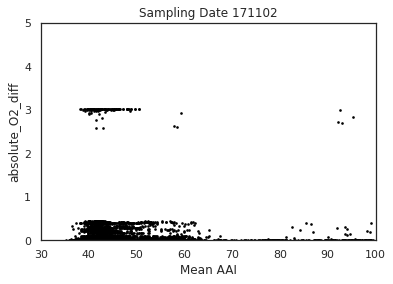

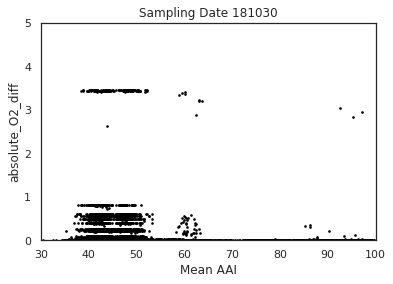

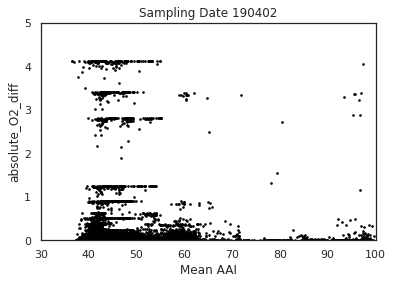

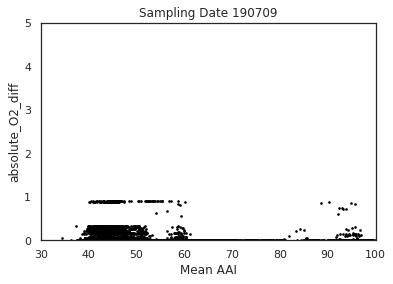

In [7]:
import matplotlib.pyplot as plt

sns.set_style("white")
dates=[171102, 181030, 190402, 190709]
for i in dates:
    df=pd.DataFrame(columns=test.columns)
    cond=test.Sample_collection_Date_A == i
    rows=test.loc[cond, :]
    df=df.append(rows, ignore_index=True)
    fig, ax = plt.subplots()
    relative_O2_fig=sns.scatterplot(data=df, x="Mean AAI", y='absolute_O2_diff', ax=ax, s=7, color="black", linewidth = 0)
    i=str(i)
    relative_O2_fig=relative_O2_fig.set_title("Sampling Date "+i)
    ax.set(ylim=(0,5), xlim=(30,100))
    plt.show()
    plt.close()

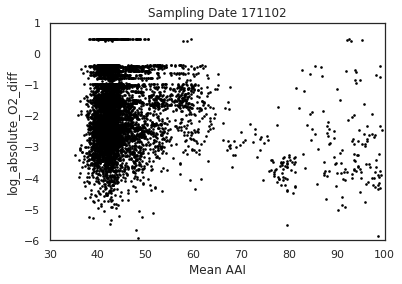

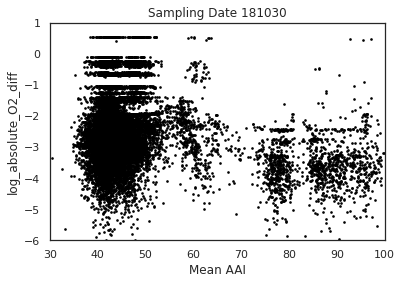

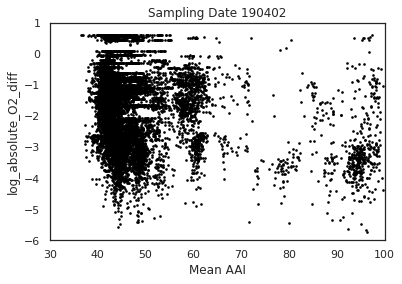

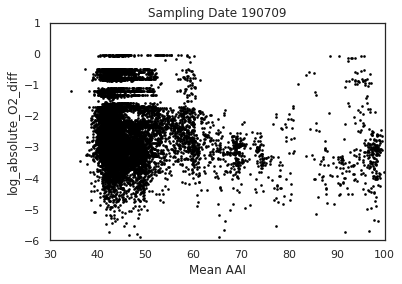

In [8]:
sns.set_style("white")
dates=[171102, 181030, 190402, 190709]
for i in dates:
    df=pd.DataFrame(columns=test.columns)
    cond=test.Sample_collection_Date_A == i
    rows=test.loc[cond, :]
    df=df.append(rows, ignore_index=True)
    fig, ax = plt.subplots()
    relative_O2_fig=sns.scatterplot(data=df, x="Mean AAI", y='log_absolute_O2_diff', ax=ax, s=7, color="black", linewidth = 0)
    i=str(i)
    relative_O2_fig=relative_O2_fig.set_title("Sampling Date "+i)
    ax.set(ylim=(-6,1), xlim=(30,100))
    plt.show()
    plt.close()

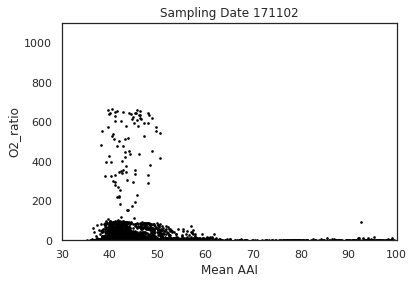

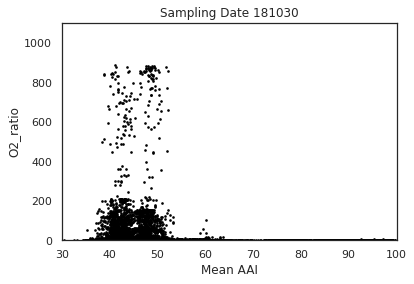

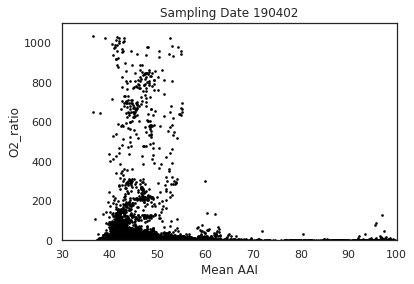

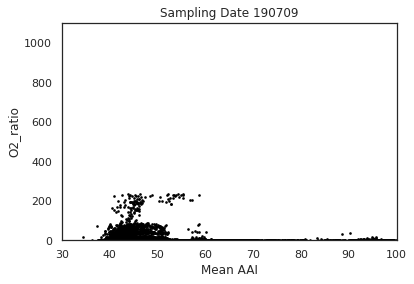

In [9]:
sns.set_style("white")
dates=[171102, 181030, 190402, 190709]
for i in dates:
    df=pd.DataFrame(columns=test.columns)
    cond=test.Sample_collection_Date_A == i
    rows=test.loc[cond, :]
    df=df.append(rows, ignore_index=True)
    fig, ax = plt.subplots()
    relative_O2_fig=sns.scatterplot(data=df, x="Mean AAI", y='O2_ratio', ax=ax, s=7, color="black", linewidth = 0)
    i=str(i)
    relative_O2_fig=relative_O2_fig.set_title("Sampling Date "+i)
    ax.set(ylim=(0,1100), xlim=(30,100))
    plt.show()
    plt.close()
    fig=relative_O2_fig.get_figure()
    fig.savefig(images+'AAI_vs_O2_ratio_'+i+".pdf")

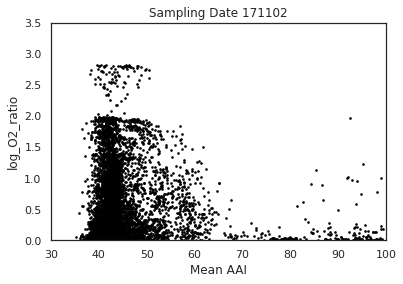

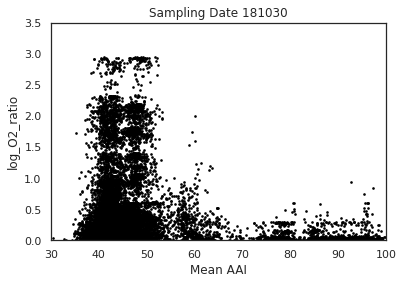

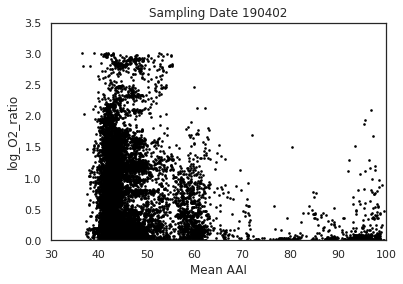

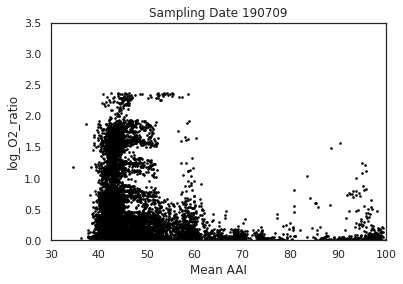

In [10]:
sns.set_style("white")
dates=[171102, 181030, 190402, 190709]
for i in dates:
    df=pd.DataFrame(columns=test.columns)
    cond=test.Sample_collection_Date_A == i
    rows=test.loc[cond, :]
    df=df.append(rows, ignore_index=True)
    fig, ax = plt.subplots()
    relative_O2_fig=sns.scatterplot(data=df, x="Mean AAI", y='log_O2_ratio', ax=ax, s=7, color="black", linewidth = 0)
    i=str(i)
    relative_O2_fig=relative_O2_fig.set_title("Sampling Date "+i)
    ax.set(ylim=(0,3.5), xlim=(30,100))
    plt.show()
    plt.close()
    fig=relative_O2_fig.get_figure()
    fig.savefig(images+'AAI_vs_log10_O2_ratio_'+i+".pdf")

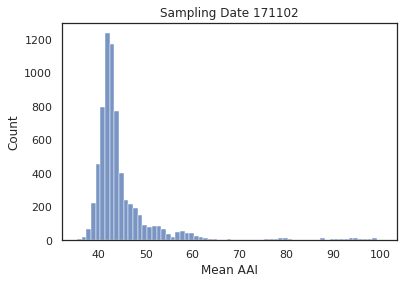

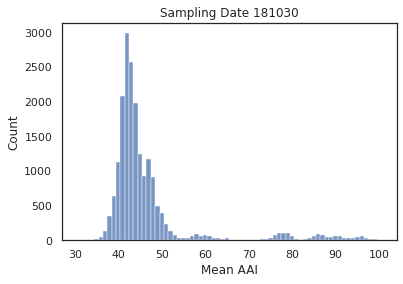

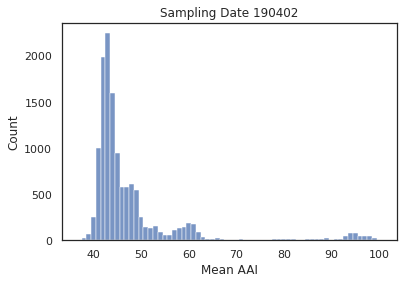

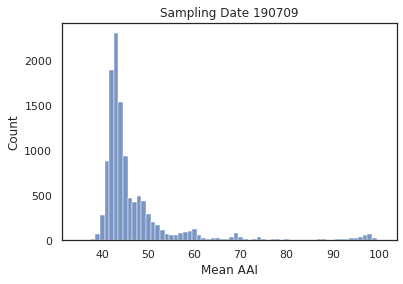

In [11]:
sns.set_style("white")
dates=[171102, 181030, 190402, 190709]
for i in dates:
    df=pd.DataFrame(columns=test.columns)
    cond=test.Sample_collection_Date_A == i
    rows=test.loc[cond, :]
    df=df.append(rows, ignore_index=True)
    fig, ax = plt.subplots()
    AAIhist=sns.histplot(data=df, x='Mean AAI', ax=ax, binwidth=1)
    i=str(i)
    AAIhist=AAIhist.set_title("Sampling Date "+i)
    fig=AAIhist.get_figure()
    fig.savefig(images+'AAI_histogram_'+i+".pdf")

In [12]:
mid=32
fields=['AAI', 'mean_O2_ratio', 'stdev_O2_ratio']
avg=pd.DataFrame(columns=fields)

while mid <101:
    lower=mid-2
    upper=mid+2
    df=pd.DataFrame(columns=test.columns)
    df=test[test['Mean AAI']>= lower]
    df=df[df['Mean AAI'] <= upper]
    O2avg=df['O2_ratio'].mean()
    O2SD=df['O2_ratio'].std()
    avg=avg.append({'AAI':mid, 'mean_O2_ratio':O2avg, 'stdev_O2_ratio':O2SD}, ignore_index=True)
    mid+=1
    
avg

,AAI,mean_O2_ratio,stdev_O2_ratio
0,32.0,1.049164,0.047937
1,33.0,2.752223,4.402371
2,34.0,3.407260,8.537641
3,35.0,15.097458,100.913924
4,36.0,8.935056,60.020460
...,...,...,...
64,96.0,3.799719,16.784336
65,97.0,8.809804,122.999214
66,98.0,9.165138,136.135101
67,99.0,11.242675,161.283607


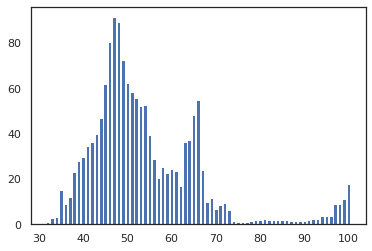

In [13]:
fig, ax = plt.subplots()
x=avg['AAI']
y=avg['mean_O2_ratio']
plt=ax.bar(x,y)

#AAIhist=AAIhist.set_title("Sampling Date "+i)
#fig=plot.get_figure()
#fig.savefig(images+'AAI_histogram_'+i+".pdf")

In [14]:
# load the SAG data and parse it down to family and SAG, merge on SAG A and then SAG B.
# parse out pairs with same family in both for Rhodhobacteraceae and pelagibacteraceae

# plot pelagi and rhodo 

In [15]:
cols=['name', 'GTDBtk_classification']
classification=pd.read_csv('/mnt/scgc/simon/microg2p/analyses/20210325_GoM_recluster/Summary_files/All_GoM_SAGs_1cell_20kb_decon_531normalized_predresp_rate_GTDBclass.csv',
                          usecols=cols)
classification[['domain', 'phyla', 'class', 'order', 'family', 'genus', 'species']]=classification.GTDBtk_classification.str.split(";", expand=True)
classification=classification[['name', 'class', 'order', 'family', 'genus']]

classification

,name,class,order,family,genus
0,AH-135-A01,c__Alphaproteobacteria,o__Pelagibacterales,f__Pelagibacteraceae,g__Pelagibacter
1,AH-135-A02,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__Hel1-33-131
2,AH-135-A03,c__Alphaproteobacteria,o__Pelagibacterales,f__Pelagibacteraceae,g__IMCC9063
3,AH-135-A04,c__Gammaproteobacteria,o__PS1,f__Thioglobaceae,g__Thioglobus
4,AH-135-A05,c__Gammaproteobacteria,o__SAR86,f__D2472,g__SCGC-AAA076-P13
...,...,...,...,...,...
5845,AH-273-P18,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__MAG-121220-bin8
5846,AH-273-P19,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__UBA3537
5847,AH-273-P20,c__Alphaproteobacteria,o__Pelagibacterales,f__Pelagibacteraceae,g__Pelagibacter_A
5848,AH-273-P22,c__Alphaproteobacteria,o__Pelagibacterales,f__Pelagibacteraceae,g__Pelagibacter


In [16]:
dates=[181030, 190402, 190709]
test=pd.read_csv(outdir+'AAI_data_tmp.csv', index_col=0)
test=test.merge(classification, how='left', left_on='SAG_A', right_on='name')
test=test.rename(columns={'family':'family_A', 'class':'class_A', 'genus':'genus_A', 'order':'order_A'})
test=test[test['Sample_collection_Date_A'].isin(dates)]
test=test.merge(classification, how='left', left_on='SAG_B', right_on='name')
test=test.rename(columns={'family':'family_B', 'class':'class_B', 'genus':'genus_B', 'order':'order_B'})
test.drop(columns=['name_x', 'name_y'], inplace=True)
test

,Genome A,Genes in A,Genome B,Genes in B,# orthologous genes,Mean AAI,Std AAI,Orthologous fraction (OF),SAG_A,SAG_B,...,log_absolute_O2_diff,log_O2_ratio,class_A,order_A,family_A,genus_A,class_B,order_B,family_B,genus_B
0,AH-545-C08_contigs,1022,AH-545-G17_contigs,793,98,42.85,8.45,12.36,AH-545-C08,AH-545-G17,...,-3.245229,0.042179,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__MS024-2A,c__Gammaproteobacteria,o__SAR86,f__D2472,g__SAR86A
1,AH-545-C08_contigs,1022,AH-545-F02_contigs,1164,79,41.51,9.26,7.73,AH-545-C08,AH-545-F02,...,-2.762000,0.143631,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__MS024-2A,c__Alphaproteobacteria,o__Puniceispirillales,f__AAA536-G10,g__AAA536-G10
2,AH-545-C08_contigs,1022,AH-545-D06_contigs,2829,138,40.83,7.54,13.50,AH-545-C08,AH-545-D06,...,-0.088261,2.126622,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__MS024-2A,c__Gammaproteobacteria,o__Pseudomonadales,f__HTCC2089,g__UBA4582
3,AH-545-C08_contigs,1022,AH-545-L08_contigs,975,162,42.08,7.98,16.62,AH-545-C08,AH-545-L08,...,-2.201567,0.306089,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__MS024-2A,c__Marinisomatia,o__Marinisomatales,f__Marinisomataceae,g__Marinisoma
4,AH-545-C08_contigs,1022,AH-545-J16_contigs,1378,158,42.16,7.84,15.46,AH-545-C08,AH-545-J16,...,-2.891355,0.101856,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__MS024-2A,c__Gammaproteobacteria,o__SAR86,f__D2472,g__D2472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44313,AH-657-C07_contigs,1079,AH-657-G05_contigs,970,113,42.62,9.52,11.65,AH-657-C07,AH-657-G05,...,-1.667736,0.731644,c__Alphaproteobacteria,o__HIMB59,f__HIMB59,g__HIMB59,c__Gammaproteobacteria,o__SAR86,f__D2472,g__D2472
44314,AH-700-E03_contigs,1862,AH-700-K05_contigs,1201,299,52.50,13.37,24.90,AH-700-E03,AH-700-K05,...,-2.389013,0.271378,c__Gammaproteobacteria,o__Pseudomonadales,f__Porticoccaceae,g__HTCC2207,c__Gammaproteobacteria,o__Pseudomonadales,f__HTCC2089,g__UBA9926
44315,AH-700-E03_contigs,1862,AH-700-P18_contigs,733,198,51.21,11.20,27.01,AH-700-E03,AH-700-P18,...,-3.077403,0.085066,c__Gammaproteobacteria,o__Pseudomonadales,f__Porticoccaceae,g__HTCC2207,c__Gammaproteobacteria,o__PS1,f__Thioglobaceae,g__Thioglobus
44316,AH-700-E03_contigs,1862,AH-700-E23_contigs,1080,673,70.21,14.22,62.31,AH-700-E03,AH-700-E23,...,-3.186190,0.064728,c__Gammaproteobacteria,o__Pseudomonadales,f__Porticoccaceae,g__HTCC2207,c__Gammaproteobacteria,o__Pseudomonadales,f__Porticoccaceae,g__HTCC2207


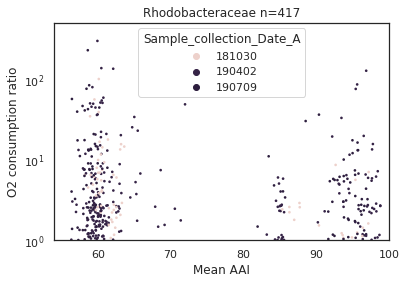

In [17]:
sns.set_style("white")

import matplotlib.pyplot as plt
plt.show()

rhod=test[test['family_B']== 'f__Rhodobacteraceae']
rhod=rhod[rhod['family_A']== 'f__Rhodobacteraceae']
rhod
fig, ax = plt.subplots()
relative_O2_fig=sns.scatterplot(data=rhod, x="Mean AAI", y='O2_ratio', ax=ax, s=7, hue="Sample_collection_Date_A", linewidth = 0)
rhod_pairs=rhod.shape[0]
rhod_pairs=str(rhod_pairs)
relative_O2_fig=relative_O2_fig.set_title("Rhodobacteraceae n="+rhod_pairs)
ax.set(ylim=(1,500), xlim=(54,100))
ax.set(ylabel='O2 consumption ratio')
ax.set(yscale='log')  
plt.show()
plt.close()
fig=relative_O2_fig.get_figure()
fig.savefig(images+'Rhodobacteraceae_AAI_vs_log10_O2_ratio_.pdf')


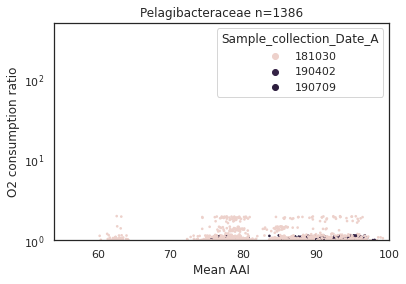

Index(['Genome A', 'Genes in A', 'Genome B', 'Genes in B',
       '# orthologous genes', 'Mean AAI', 'Std AAI',
       'Orthologous fraction (OF)', 'SAG_A', 'SAG_B', 'O2_consumed_SAG_A',
       'Sample_collection_Date_A', 'O2_consumed_SAG_B',
       'Sample_collection_Date_B', 'absolute_O2_diff', 'O2_ratio_A:B',
       'O2_ratio_B:A', 'O2_ratio', 'log_absolute_O2_diff', 'log_O2_ratio',
       'class_A', 'order_A', 'family_A', 'genus_A', 'class_B', 'order_B',
       'family_B', 'genus_B'],
      dtype='object')


In [18]:
pelagi=test[test['family_B']== 'f__Pelagibacteraceae']
pelagi=pelagi[pelagi['family_A']== 'f__Pelagibacteraceae']

fig, ax = plt.subplots()
relative_O2_fig=sns.scatterplot(data=pelagi, x="Mean AAI", y='O2_ratio', ax=ax, s=7, hue="Sample_collection_Date_A", linewidth = 0)
pelagi_pairs=pelagi.shape[0]
pelagi_pairs=str(pelagi_pairs)
relative_O2_fig=relative_O2_fig.set_title("Pelagibacteraceae n="+pelagi_pairs)
ax.set(ylim=(1,500), xlim=(54,100))
ax.set(ylabel='Log10 O2 consumption ratio')
ax.set(ylabel='O2 consumption ratio')
ax.set(yscale='log')  
plt.show()
plt.close()
fig=relative_O2_fig.get_figure()
fig.savefig(images+'Pelagibacteraceae_AAI_vs_log10_O2_ratio_.pdf')

print(pelagi.columns)

In [19]:

test['Same_family']=np.where(test['family_B']==test['family_A'], 'Yes', 'No')
test

,Genome A,Genes in A,Genome B,Genes in B,# orthologous genes,Mean AAI,Std AAI,Orthologous fraction (OF),SAG_A,SAG_B,...,log_O2_ratio,class_A,order_A,family_A,genus_A,class_B,order_B,family_B,genus_B,Same_family
0,AH-545-C08_contigs,1022,AH-545-G17_contigs,793,98,42.85,8.45,12.36,AH-545-C08,AH-545-G17,...,0.042179,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__MS024-2A,c__Gammaproteobacteria,o__SAR86,f__D2472,g__SAR86A,No
1,AH-545-C08_contigs,1022,AH-545-F02_contigs,1164,79,41.51,9.26,7.73,AH-545-C08,AH-545-F02,...,0.143631,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__MS024-2A,c__Alphaproteobacteria,o__Puniceispirillales,f__AAA536-G10,g__AAA536-G10,No
2,AH-545-C08_contigs,1022,AH-545-D06_contigs,2829,138,40.83,7.54,13.50,AH-545-C08,AH-545-D06,...,2.126622,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__MS024-2A,c__Gammaproteobacteria,o__Pseudomonadales,f__HTCC2089,g__UBA4582,No
3,AH-545-C08_contigs,1022,AH-545-L08_contigs,975,162,42.08,7.98,16.62,AH-545-C08,AH-545-L08,...,0.306089,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__MS024-2A,c__Marinisomatia,o__Marinisomatales,f__Marinisomataceae,g__Marinisoma,No
4,AH-545-C08_contigs,1022,AH-545-J16_contigs,1378,158,42.16,7.84,15.46,AH-545-C08,AH-545-J16,...,0.101856,c__Bacteroidia,o__Flavobacteriales,f__Flavobacteriaceae,g__MS024-2A,c__Gammaproteobacteria,o__SAR86,f__D2472,g__D2472,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44313,AH-657-C07_contigs,1079,AH-657-G05_contigs,970,113,42.62,9.52,11.65,AH-657-C07,AH-657-G05,...,0.731644,c__Alphaproteobacteria,o__HIMB59,f__HIMB59,g__HIMB59,c__Gammaproteobacteria,o__SAR86,f__D2472,g__D2472,No
44314,AH-700-E03_contigs,1862,AH-700-K05_contigs,1201,299,52.50,13.37,24.90,AH-700-E03,AH-700-K05,...,0.271378,c__Gammaproteobacteria,o__Pseudomonadales,f__Porticoccaceae,g__HTCC2207,c__Gammaproteobacteria,o__Pseudomonadales,f__HTCC2089,g__UBA9926,No
44315,AH-700-E03_contigs,1862,AH-700-P18_contigs,733,198,51.21,11.20,27.01,AH-700-E03,AH-700-P18,...,0.085066,c__Gammaproteobacteria,o__Pseudomonadales,f__Porticoccaceae,g__HTCC2207,c__Gammaproteobacteria,o__PS1,f__Thioglobaceae,g__Thioglobus,No
44316,AH-700-E03_contigs,1862,AH-700-E23_contigs,1080,673,70.21,14.22,62.31,AH-700-E03,AH-700-E23,...,0.064728,c__Gammaproteobacteria,o__Pseudomonadales,f__Porticoccaceae,g__HTCC2207,c__Gammaproteobacteria,o__Pseudomonadales,f__Porticoccaceae,g__HTCC2207,Yes


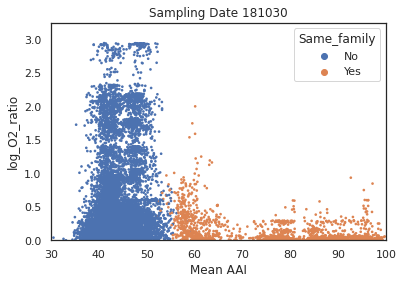

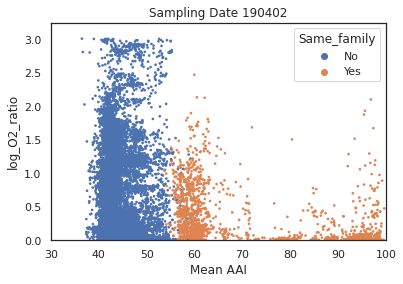

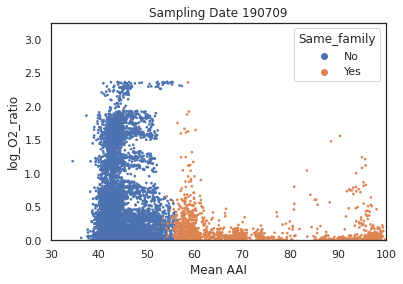

In [20]:
sns.set_style("white")
dates=[181030, 190402, 190709]
for i in dates:
    df=pd.DataFrame(columns=test.columns)
    cond=test.Sample_collection_Date_A == i
    rows=test.loc[cond, :]
    df=df.append(rows, ignore_index=True)
    fig, ax = plt.subplots()
    relative_O2_fig=sns.scatterplot(data=df, x="Mean AAI", y='log_O2_ratio', ax=ax, s=7, hue='Same_family', linewidth = 0)
    i=str(i)
    relative_O2_fig=relative_O2_fig.set_title("Sampling Date "+i)
    ax.set(ylim=(0,3.25), xlim=(30,100))
    plt.show()
    plt.close()
    fig=relative_O2_fig.get_figure()
    fig.savefig(images+'AAI_vs_log10_O2_ratio_Same_family'+i+".pdf")

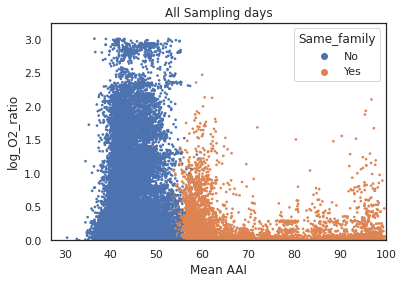

In [21]:
fig, ax = plt.subplots()
relative_O2_fig=sns.scatterplot(data=test, x="Mean AAI", y='log_O2_ratio', ax=ax, s=7, hue='Same_family', linewidth = 0)
i=str(i)
relative_O2_fig=relative_O2_fig.set_title("All Sampling days")
ax.set(ylim=(0,3.25), xlim=(27,100))
plt.show()
fig=relative_O2_fig.get_figure()
fig.savefig(images+'AAI_vs_log10_O2_ratio_Same_family.pdf')



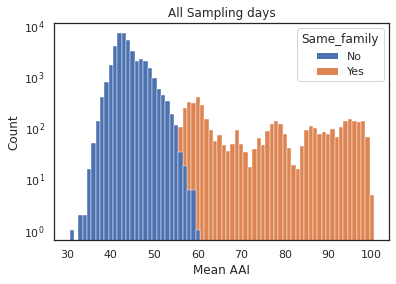

In [22]:
AAI_hist=sns.histplot(data=test, x="Mean AAI", hue='Same_family', alpha=1, binwidth=1,log_scale=(False, True))
i=str(i)
AAI_hist=AAI_hist.set_title("All Sampling days")
ax.set(xlim=(27,100))
fig=AAI_hist.get_figure()
fig.savefig(images+'AAI_hist_Same_family.pdf')
plt.show()


In [23]:
test['divergence']=np.where(test['genus_A']==test['genus_B'], 'Same Genus', 
                            np.where(test['family_A']==test['family_B'], 'Same Family', 
                                     np.where(test['order_A']==test['order_B'], 'Same Order',  
                                              np.where(test['class_A']==test['class_B'], 'Same Class', 'Different Class'))))
test['AAI_round']=test['Mean AAI'].round(decimals=0)
test=test[test['log_O2_ratio']>0]
test.to_csv(outdir+'all_data_for_fig2B.csv')
test

,Genome A,Genes in A,Genome B,Genes in B,# orthologous genes,Mean AAI,Std AAI,Orthologous fraction (OF),SAG_A,SAG_B,...,order_A,family_A,genus_A,class_B,order_B,family_B,genus_B,Same_family,divergence,AAI_round
0,AH-545-C08_contigs,1022,AH-545-G17_contigs,793,98,42.85,8.45,12.36,AH-545-C08,AH-545-G17,...,o__Flavobacteriales,f__Flavobacteriaceae,g__MS024-2A,c__Gammaproteobacteria,o__SAR86,f__D2472,g__SAR86A,No,Different Class,43.0
1,AH-545-C08_contigs,1022,AH-545-F02_contigs,1164,79,41.51,9.26,7.73,AH-545-C08,AH-545-F02,...,o__Flavobacteriales,f__Flavobacteriaceae,g__MS024-2A,c__Alphaproteobacteria,o__Puniceispirillales,f__AAA536-G10,g__AAA536-G10,No,Different Class,42.0
2,AH-545-C08_contigs,1022,AH-545-D06_contigs,2829,138,40.83,7.54,13.50,AH-545-C08,AH-545-D06,...,o__Flavobacteriales,f__Flavobacteriaceae,g__MS024-2A,c__Gammaproteobacteria,o__Pseudomonadales,f__HTCC2089,g__UBA4582,No,Different Class,41.0
3,AH-545-C08_contigs,1022,AH-545-L08_contigs,975,162,42.08,7.98,16.62,AH-545-C08,AH-545-L08,...,o__Flavobacteriales,f__Flavobacteriaceae,g__MS024-2A,c__Marinisomatia,o__Marinisomatales,f__Marinisomataceae,g__Marinisoma,No,Different Class,42.0
4,AH-545-C08_contigs,1022,AH-545-J16_contigs,1378,158,42.16,7.84,15.46,AH-545-C08,AH-545-J16,...,o__Flavobacteriales,f__Flavobacteriaceae,g__MS024-2A,c__Gammaproteobacteria,o__SAR86,f__D2472,g__D2472,No,Different Class,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44313,AH-657-C07_contigs,1079,AH-657-G05_contigs,970,113,42.62,9.52,11.65,AH-657-C07,AH-657-G05,...,o__HIMB59,f__HIMB59,g__HIMB59,c__Gammaproteobacteria,o__SAR86,f__D2472,g__D2472,No,Different Class,43.0
44314,AH-700-E03_contigs,1862,AH-700-K05_contigs,1201,299,52.50,13.37,24.90,AH-700-E03,AH-700-K05,...,o__Pseudomonadales,f__Porticoccaceae,g__HTCC2207,c__Gammaproteobacteria,o__Pseudomonadales,f__HTCC2089,g__UBA9926,No,Same Order,52.0
44315,AH-700-E03_contigs,1862,AH-700-P18_contigs,733,198,51.21,11.20,27.01,AH-700-E03,AH-700-P18,...,o__Pseudomonadales,f__Porticoccaceae,g__HTCC2207,c__Gammaproteobacteria,o__PS1,f__Thioglobaceae,g__Thioglobus,No,Same Class,51.0
44316,AH-700-E03_contigs,1862,AH-700-E23_contigs,1080,673,70.21,14.22,62.31,AH-700-E03,AH-700-E23,...,o__Pseudomonadales,f__Porticoccaceae,g__HTCC2207,c__Gammaproteobacteria,o__Pseudomonadales,f__Porticoccaceae,g__HTCC2207,Yes,Same Genus,70.0


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


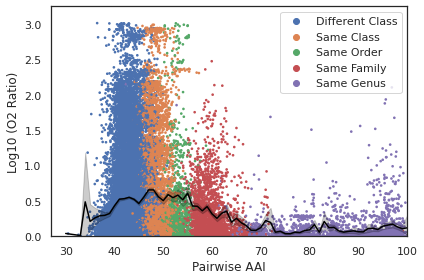

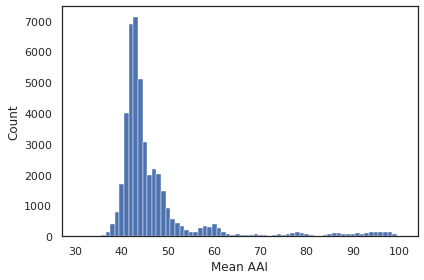

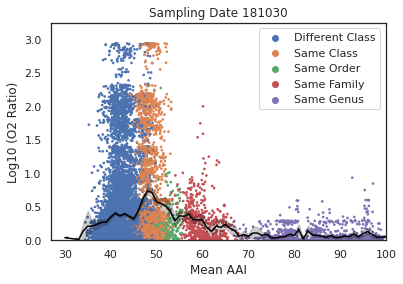

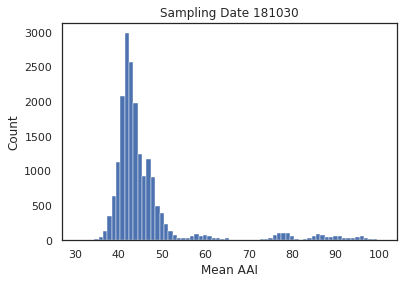

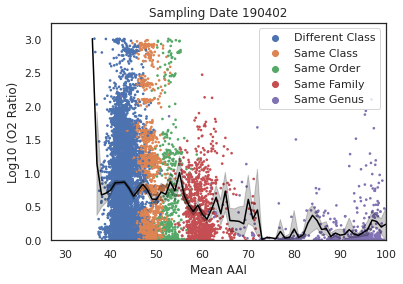

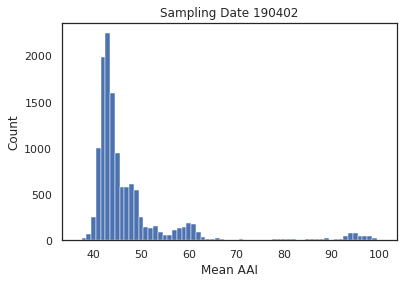

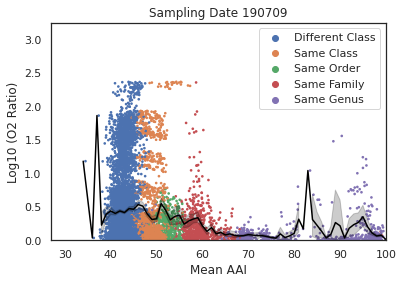

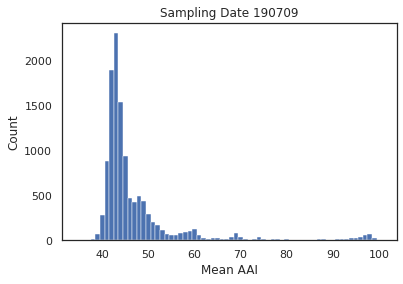

In [24]:
hue_order=['Different Class', 'Same Class', 'Same Order', 'Same Family', 'Same Genus']
fig, ax = plt.subplots()
log_relative_O2_fig=sns.scatterplot(data=test, x="Mean AAI", y='log_O2_ratio', ax=ax, s=7, hue='divergence', linewidth = 0, hue_order=hue_order)
i=str(i)
#relative_O2_fig=relative_O2_fig.set_title("All Sampling days")

sns.lineplot(data=test, x="AAI_round", y='log_O2_ratio', ci=95, color='black')
ax.set(ylabel='Log10 (O2 Ratio)')
ax.set(xlabel='Pairwise AAI')
ax.set(ylim=(0,3.25), xlim=(27,100))
plt.xlabel('Pairwise AAI', family='Helvetica')
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig(images+'Fig2B_AAI_vs_log10_O2_ratio_tax_divergence.pdf')
plt.savefig(images+'Fig2B_AAI_vs_log10_O2_ratio_tax_divergence.png', dpi=300)
plt.show()



AAI_hist=sns.histplot(data=test, x="Mean AAI", alpha=1, binwidth=1)
i=str(i)
#AAI_hist=AAI_hist.set_title("All Sampling days")
ax.set(xlim=(27,100))
plt.tight_layout()
fig=AAI_hist.get_figure()
fig.savefig(images+'AAI_histogram.pdf')
plt.show()

for i in dates:
    df=pd.DataFrame(columns=test.columns)
    cond=test.Sample_collection_Date_A == i
    rows=test.loc[cond, :]
    df=df.append(rows, ignore_index=True)
    fig, ax = plt.subplots()
    relative_O2_fig=sns.scatterplot(data=df, x="Mean AAI", y='log_O2_ratio', ax=ax, s=7, hue='divergence', linewidth = 0, hue_order=hue_order)
    i=str(i)
    relative_O2_fig=relative_O2_fig.set_title("Sampling Date "+i)
    sns.lineplot(data=df, x="AAI_round", y='log_O2_ratio', ci=95, color='black')
    ax.set(ylim=(0,3.25), xlim=(27,100))
    ax.set(ylabel='Log10 (O2 Ratio)')
    plt.show()
    plt.tight_layout()
    plt.close()
    fig=relative_O2_fig.get_figure()
    fig.savefig(images+'AAI_vs_log10_O2_ratio_divergence'+i+".pdf")
    
    AAIhist=sns.histplot(data=df, x='Mean AAI', binwidth=1, hue_order=hue_order, alpha=1)
    i=str(i)
    AAIhist=AAIhist.set_title("Sampling Date "+i)
    ax.set(xlim=(27,100))
    fig=AAIhist.get_figure()
    fig.savefig(images+'AAI_histogram_'+i+".pdf")
    plt.show()


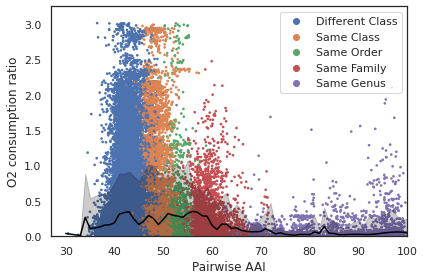

In [25]:
fig, ax = plt.subplots()
log_relative_O2_fig=sns.scatterplot(data=test, x="Mean AAI", y='log_O2_ratio', ax=ax, s=7, hue='divergence', linewidth = 0, hue_order=hue_order)
sns.lineplot(data=test, x="AAI_round", y='log_O2_ratio', color='black', estimator=np.median, ci='sd')

ax.set(ylim=(0,3.25), xlim=(27,100))
plt.xlabel('Pairwise AAI', family='Helvetica')
plt.ylabel('log10 O2 consumption ratio', family='Helvetica')
plt.tight_layout()
plt.rcParams['pdf.fonttype'] = 42
plt.savefig(images+'Fig2B_AAI_vs_log10_O2_ratio_tax_divergence.pdf')

plt.show()


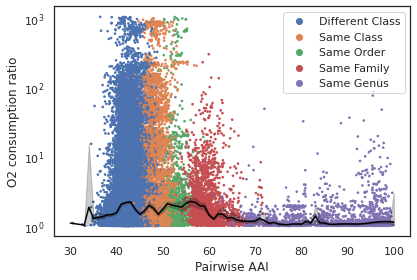

In [26]:
fig, ax = plt.subplots()

newfig=sns.scatterplot(data=test, x="Mean AAI", y='O2_ratio', ax=ax, s=7, hue='divergence', linewidth = 0, hue_order=hue_order)
sns.lineplot(data=test, x="AAI_round", y='O2_ratio', color='black', estimator=np.median)

plt.xlabel('Pairwise AAI', family='Helvetica')
plt.ylabel('O2 consumption ratio', family='Helvetica')
plt.tight_layout()
plt.yscale('log')
plt.rcParams['pdf.fonttype'] = 42
plt.show()

fig=newfig.get_figure()
fig.savefig(images+'Fig2B_AAI_vs_O2_ratio_tax_divergence.pdf')

In [27]:
fig_data=test[['Mean AAI', 'O2_ratio', 'divergence', 'AAI_round', 'log_O2_ratio']].copy()
fig_data=fig_data[fig_data['log_O2_ratio']>0]
fig_data.to_csv(outdir+'data_for_fig2B.csv')
fig_data

,Mean AAI,O2_ratio,divergence,AAI_round,log_O2_ratio
0,42.85,1.101995,Different Class,43.0,0.042179
1,41.51,1.391973,Different Class,42.0,0.143631
2,40.83,133.851119,Different Class,41.0,2.126622
3,42.08,2.023432,Different Class,42.0,0.306089
4,42.16,1.264318,Different Class,42.0,0.101856
...,...,...,...,...,...
44313,42.62,5.390690,Different Class,43.0,0.731644
44314,52.50,1.868007,Same Order,52.0,0.271378
44315,51.21,1.216371,Same Class,51.0,0.085066
44316,70.21,1.160722,Same Genus,70.0,0.064728


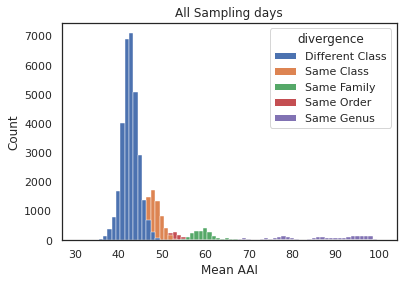

In [28]:
AAI_hist=sns.histplot(data=test, x="Mean AAI", hue='divergence', alpha=1, binwidth=1)
i=str(i)
AAI_hist=AAI_hist.set_title("All Sampling days")
ax.set(xlim=(27,100))
fig=AAI_hist.get_figure()
fig.savefig(images+'AAI_hist_tax_divergence.pdf')
plt.show()


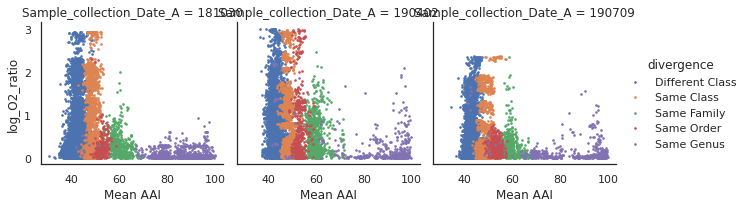

In [29]:
g=sns.FacetGrid(data=test, col='Sample_collection_Date_A', hue='divergence',)
g.map(sns.scatterplot, "Mean AAI", 'log_O2_ratio', s=7,  linewidth = 0)
g.add_legend()